# I. Classification

In [17]:
from sklearn import datasets, svm, linear_model
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
digits=datasets.load_digits()

In [3]:
x=digits.data
y=digits.target

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)

## 1. k-Nearest Neighbors

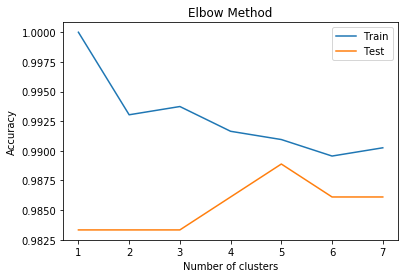

In [4]:
seed = 0
elbow_train = dict()
elbow_test = dict()
for k in range(1,8):
    estimator = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
    pred_y_train = estimator.predict(x_train)
    score_train = accuracy_score(y_train, pred_y_train)
    elbow_train[k] = score_train
    
    pred_y_test = estimator.predict(x_test)
    score_test = accuracy_score(y_test, pred_y_test)
    elbow_test[k] = score_test


elbow_df=pd.DataFrame([elbow_train,elbow_test],index=["Train","Test"]).T

ax = elbow_df.plot(title = 'Elbow Method')
#ax = elbow_df_test.plot()
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Accuracy')
#plt.plot(3,elbow_df[3],'ro')

accuracy_knn=elbow_df.iloc[2,1]

## 2. Support Vector Machine

In [5]:
C=1

#Kernel = linear
clf_linear = svm.SVC(kernel='linear', C=C)
clf_linear.fit(x_train, y_train)
y_pred_linear = clf_linear.predict(x_test)
print("Classification report for SVC with linear kernel \n",classification_report(y_test, y_pred_linear))

accuracy_svm=accuracy_score(y_test, y_pred_linear)

#Kernel = rbf
clf_rbf = svm.SVC(kernel='rbf', gamma='auto', C=C)
clf_rbf.fit(x_train, y_train)
y_pred_rbf = clf_rbf.predict(x_test)
print("Classification report for SVC with RBF kernel \n",classification_report(y_test, y_pred_rbf))

#Kernel = poly 3
clf_p3 = svm.SVC(kernel='poly',degree=3,gamma='auto',C=C)
clf_p3.fit(x_train, y_train)
y_pred_p3 = clf_p3.predict(x_test)
print("Classification report for SVC with polynomial (degree 3) kernel \n",classification_report(y_test, y_pred_p3))

#Kernel = linear SVC
clf_l2 = svm.LinearSVC(C=C, max_iter=10000)
clf_l2.fit(x_train, y_train)
y_pred_l2 = clf_l2.predict(x_test)
print("Classification report for LinearSVC (linear kernel) \n",classification_report(y_test, y_pred_l2))

"""= (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))"""

Classification report for SVC with linear kernel 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.95      1.00      0.97        35
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        34
           4       0.95      1.00      0.97        35
           5       0.96      0.96      0.96        28
           6       1.00      1.00      1.00        34
           7       1.00      0.97      0.99        39
           8       0.97      0.94      0.96        34
           9       0.97      0.95      0.96        37

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Classification report for SVC with RBF kernel 
               precision    recall  f1-score   support

           0       1.00      0.41      0.59        41
           1       1.00      0.31

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


"= (svm.SVC(kernel='linear', C=C),\n          svm.LinearSVC(C=C, max_iter=10000),\n          svm.SVC(kernel='rbf', gamma=0.7, C=C),\n          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))"

## 3. Naive Bayes

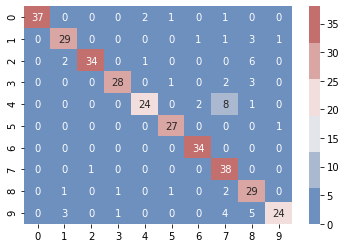

In [6]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)

conf_mat_gnb=confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(conf_mat_gnb, annot=True, cmap=sns.color_palette("vlag"))

accuracy_gnb=accuracy_score(y_test, y_pred_gnb)


            0
KNN  0.983333
SVM  0.980556
GNB  0.844444


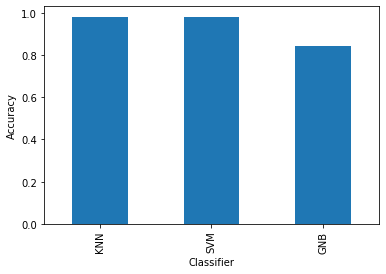

In [7]:
df_accuracy=pd.DataFrame([accuracy_knn,accuracy_svm,accuracy_gnb],index=["KNN","SVM","GNB"])
ax=df_accuracy.plot.bar(legend=False)
ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy')

print(df_accuracy)

# II. Regression

## 1. Linear Regression

In [8]:
gapminder=pd.read_csv("gapminder.csv")

In [9]:
gapminder.dtypes

population           int64
fertility          float64
HIV                float64
CO2                float64
BMI_male           float64
GDP                  int64
BMI_female         float64
life               float64
child_mortality    float64
Region              object
dtype: object

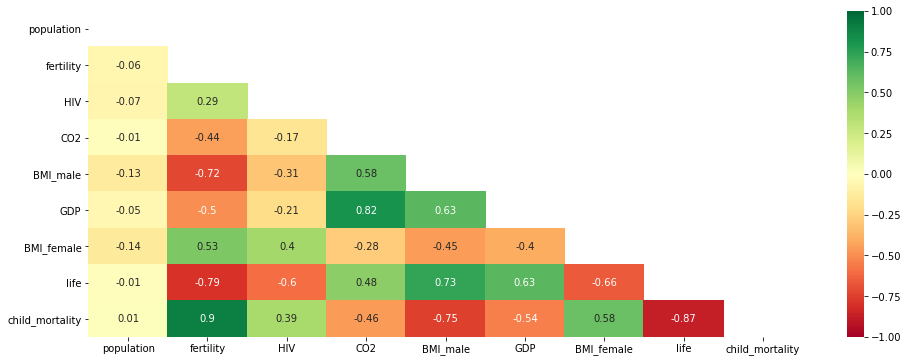

In [10]:
corr_gap=gapminder.corr()

plt.figure(figsize=(16, 6))

mask = np.triu(np.ones_like(corr_gap, dtype=bool))
sns.heatmap(corr_gap.round(2), annot=True, mask=mask, cmap = 'RdYlGn', vmin=-1, vmax=1)

In [11]:
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


Score using fertility:  0.6192442167740035
5-fold cross validation for fertility feature [0.71001079 0.75007717 0.55271526 0.547501   0.52410561]


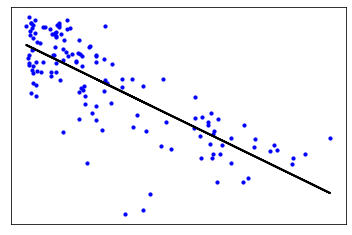

In [20]:
x_single=gapminder["fertility"].values.reshape(-1,1)
y=gapminder["life"]

regr_single = linear_model.LinearRegression()

regr_single.fit(x_single, y)
y_pred = regr_single.predict(x_single)
print("Score using fertility: ",regr_single.score(x_single,y))

k_fold = KFold(n_splits=5)

print("5-fold cross validation for fertility feature",cross_val_score(regr_single,x_single,y,cv=k_fold))

plt.scatter(x_single, y,  color='blue',s=10)
plt.plot(x_single, y_pred, color='black', linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()

In [21]:
x_all_features=gapminder[gapminder.columns.difference(['life','Region'])].values

regr_all_features = linear_model.LinearRegression()

regr_all_features.fit(x_all_features, y)
y_pred_all = regr_all_features.predict(x_all_features)
print("Score using all features: ",regr_all_features.score(x_all_features,y))
k_fold = KFold(n_splits=5)
print("5-fold cross validation for all features",cross_val_score(regr_all_features,x_all_features,y,cv=k_fold))


Score using all features:  0.8978171883856771
5-fold cross validation for all features [0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]


## 2. Logistic Regression

In [44]:
creditcard=pd.read_csv("creditcard.csv")
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [45]:
fraud=creditcard.loc[creditcard["Class"]==1]
nonfraud=creditcard.loc[creditcard["Class"]==0]
print(len(fraud),"frauds,",len(nonfraud),"nonfrauds")

492 frauds, 284315 nonfrauds


Text(0, 0.5, 'Class')

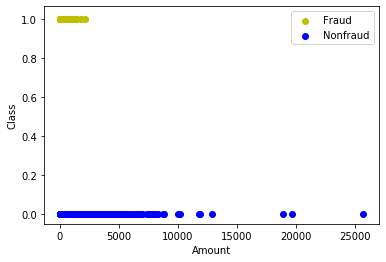

In [46]:
plt.scatter(x=fraud["Amount"],y=fraud["Class"],color="y",label="Fraud")
plt.scatter(x=nonfraud["Amount"],y=nonfraud["Class"],color="b",label="Nonfraud")

plt.legend()
plt.xlabel('Amount')
plt.ylabel('Class')


In [76]:
x_lr=creditcard[creditcard.columns.difference(["Time","Class"])]
y_lr=creditcard["Class"]

x_train_lr, x_test_lr, y_train_lr, y_test_lr= train_test_split(x_lr,y_lr,test_size=0.4)

clf_lr=linear_model.LogisticRegression().fit(x_train_lr,y_train_lr)

y_pred_lr=clf_lr.predict(x_test_lr)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


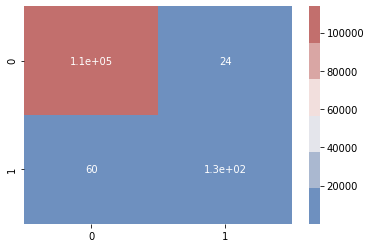

In [75]:
conf_mat_lr=confusion_matrix(y_test_lr, y_pred_lr).round(3)
sns.heatmap(conf_mat_lr, annot=True, cmap=sns.color_palette("vlag"))
